# Проект по аналитике гейм-индустрии на основе исторических данных 

 В этом проекте я буду анализировать датасет, который состоит из нескольких переменных, которые принимают вид строк, например, name, platform, genre, rating, целочисленные значения, например, year_of_release, critic_score, а также дробные значения: _sales, user_score. Также в столбце rating можно встретить значения, которые отвечают за возрастные ограничения по играм, например Е10+ означает, что игра доступна для лиц старше 10 лет, а рейтинг ЕС означает "Early childhood" и этот продукт доступен для всех. 

 Импорт нужных библиотек

In [1]:
import pandas as pd
import sys
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as st
from scipy import stats
import numpy as np

sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

## Предобработка данных

In [5]:
df = df.rename(columns={'Name': 'name', 
                        'Platform': 'platform',
                        'Year_of_Release': 'year_of_release', 
                        'Genre': 'genre',
                        'NA_sales': 'na_sales', 
                        'EU_sales': 'eu_sales', 
                        'JP_sales': 'jp_sales',
                        'Other_sales': 'other_sales', 
                        'Critic_Score': 'critic_score',
                        'User_Score': 'user_score', 
                        'Rating': 'rating'}, errors='raise')
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


In [7]:
df = df.dropna(subset=['name'])

Строки в столбце name, в который пропущены названия можно заменить, потому что в этом столбце всего 2 пропуска.

In [8]:
print(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [9]:
df = df.dropna(subset = ['year_of_release'])
display(df['year_of_release'])

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16444, dtype: float64

In [10]:
df['year_of_release'] = df['year_of_release'].astype(int)

<AxesSubplot:ylabel='Frequency'>

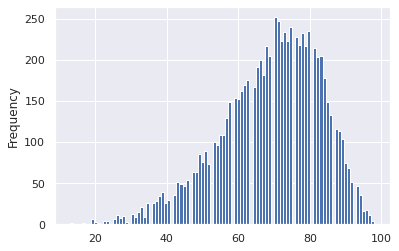

In [11]:
df['critic_score'].plot(kind='hist', bins=100)

In [12]:
df['critic_score'] = df['critic_score'].astype('Int64', errors='ignore')
df['critic_score']

0          76
1        <NA>
2          82
3          80
4        <NA>
         ... 
16710    <NA>
16711    <NA>
16712    <NA>
16713    <NA>
16714    <NA>
Name: critic_score, Length: 16444, dtype: Int64

In [13]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [14]:
df['user_score'] = df['user_score'].replace('tbd', 0)
df['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: object

In [15]:
# Преобразуем значения в str, чтобы удалить пропущенные значения
df['name'] = df['name'].astype(str)
df['name'] = df['name'].dropna()

In [16]:
df['genre'] = df['genre'].astype(str)
df['genre'] = df['genre'].dropna()

In [17]:
# Посчитаем суммарные продажи и запишем их в новый столбец
sys.setrecursionlimit(3000)
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Удалим явные дубликаты

In [18]:
df['name'] = df['name'].drop_duplicates()

df['name']

0                      Wii Sports
1               Super Mario Bros.
2                  Mario Kart Wii
3               Wii Sports Resort
4        Pokemon Red/Pokemon Blue
                   ...           
16710                         NaN
16711            LMA Manager 2007
16712     Haitaka no Psychedelica
16713                         NaN
16714                         NaN
Name: name, Length: 16444, dtype: object

Явные дубликаты можно удалить только в стобце name, потому что последующие столбцы напрямую зависят от этого столбца. 

## Исследовательский анализ данных

Посмотрим, сколько было выпущено игр по годам: 

<AxesSubplot:ylabel='Frequency'>

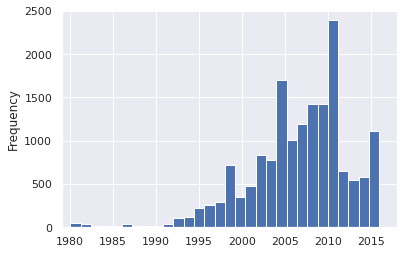

In [19]:
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
df['year_of_release'].plot(kind='hist', bins=30, xlim=(1979, 2018))

Рассматривая график можно сделать вывод, что игры стали выходить намного чаще в 21 веке, а именно сильный рост наблюдается после 1995 года. Отвечая на вопрос в задании можно сказать, что не все данные за пропущенные периоды важны, потому что при небольшом количестве пропущенных значений их можно будет заменить или восстановить. 

In [20]:
platform = pd.concat([df['platform'], df['total_sales']], axis=1)

print('Total sales for PS2:', platform.loc[platform['platform'] == 'PS2', 'total_sales'].sum())
print('Total sales for X360:', platform.loc[platform['platform'] == 'X360', 'total_sales'].sum())
print('Total sales for PS3:', platform.loc[platform['platform'] == 'PS3', 'total_sales'].sum())
print('Total sales for Wii:', platform.loc[platform['platform'] == 'Wii', 'total_sales'].sum())
print('Total sales for PS:', platform.loc[platform['platform'] == 'PS', 'total_sales'].sum())

Total sales for PS2: 1233.56
Total sales for X360: 961.2400000000001
Total sales for PS3: 931.34
Total sales for Wii: 891.18
Total sales for PS: 727.58


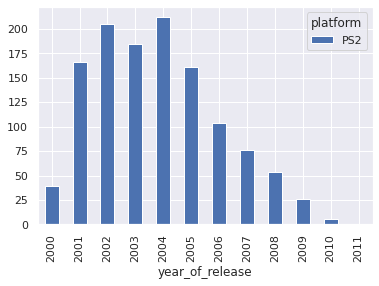

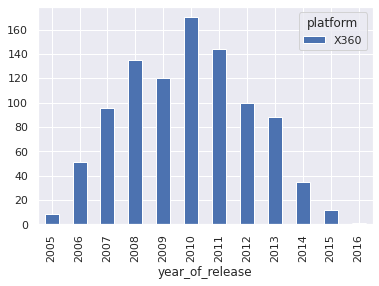

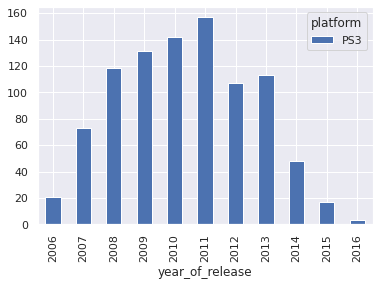

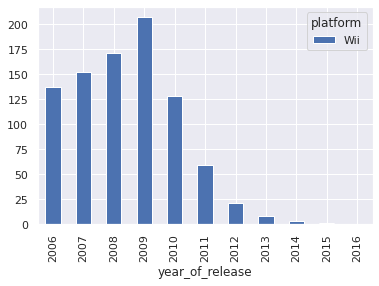

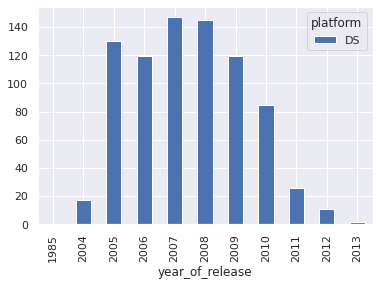

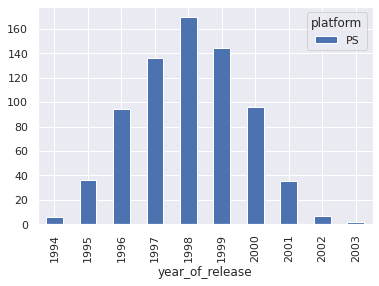

In [21]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)

top_platforms = top_platforms.index.tolist() #сформируем список из названий топовый платформ
for p in top_platforms: 
    (df[df['platform'] == p]
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='bar'))


По графикам можно сделать вывод о том, что в среднем каждая платформа живет 8-10 лет. 

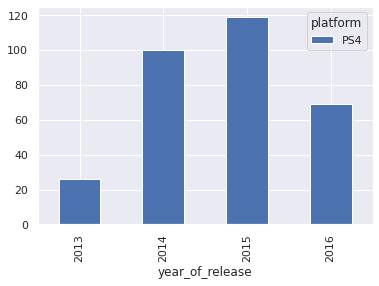

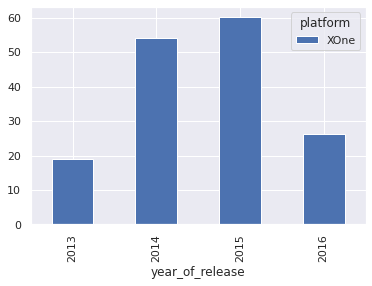

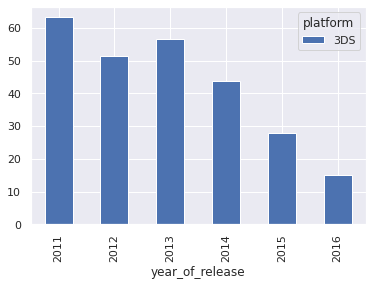

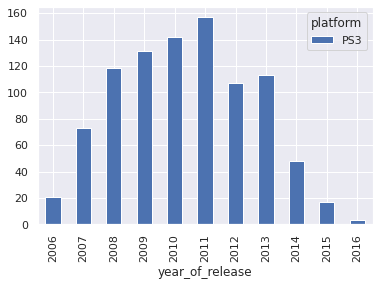

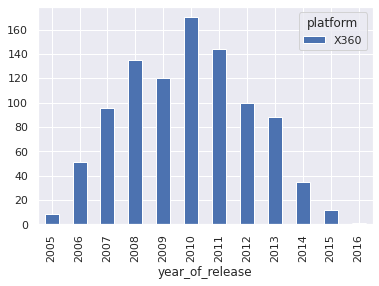

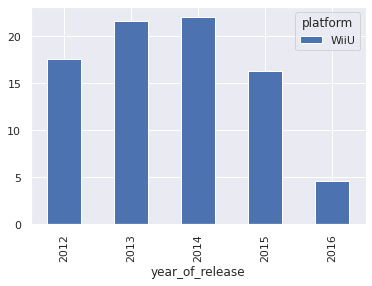

In [22]:
period = df.query('year_of_release > 2013')

top_platforms_act = period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)

top_platforms_act = top_platforms_act.index.tolist() 

for p in top_platforms_act: 
    (df[df['platform'] == p]
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='bar'))


Исходя из данных можно сделать вывод о топ-5 самых популярных платформы за 3 года: 

2014 год: 
1) PS4 - 100.00

2) XOne - 54.07

3) PS3 - 47.76

4) 3DS - 43.76

5) X360 - 34.74

2015 год: 
1) PS4 - 118.90

2) XOne - 60.14

3) 3DS - 27.78

4) PS3 - 16.82

5) WiiU - 16.35

2016 год:

1) PS4 - 69.25

2) XOne - 26.15

3) 3DS - 15.14 

4) PC - 5.25

5) WiiU - 4.60

In [23]:
df_new = df.pivot_table(index='platform', values=['year_of_release'], aggfunc='median')
df_new['year_of_release'] = df_new['year_of_release'].astype(int)
display(df_new.head(10))

,year_of_release
platform,
2600,1982
3DO,1995
3DS,2013
DC,2000
DS,2008
GB,1997
GBA,2003
GC,2003
GEN,1993


In [24]:
period = df.query('year_of_release > 2013')

top = period.query('platform not in ["PS2", "X360","PS3", "Wii", "PS", "DS"]')
display(top)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,NaN,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


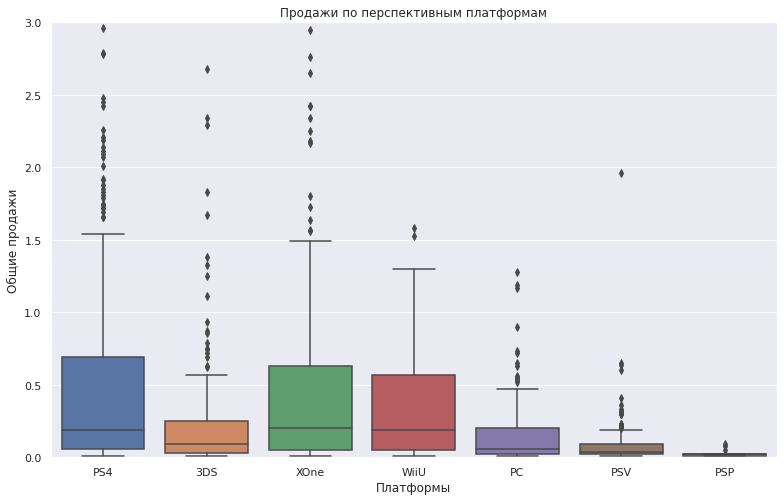

In [25]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = top, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))
plt.show()

Таким образом можно выделить платформы, которые будут более привлекательными, например, PS4, XOne, WiiU.

### Исследование корреляций


Построим графики и найдем корреляцию для потенциально прибыльных платформ.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции составляет  0.40266141068104083


/tmp/ipykernel_1564/1585031103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4['critic_score'] = ps4['critic_score'].astype(float)
/tmp/ipykernel_1564/1585031103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4['total_sales'] = ps4['total_sales'].astype(float)


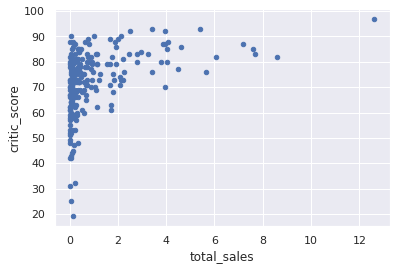

In [26]:
ps4 = top.query('platform == "PS4"')
ps4.plot(x='total_sales', y='critic_score', kind='scatter')
ps4['critic_score'] = ps4['critic_score'].astype(float)
ps4['total_sales'] = ps4['total_sales'].astype(float)
print('Коэффициент корреляции составляет ',ps4['critic_score'].corr(ps4['total_sales']))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции составляет  0.01896192462916976


/tmp/ipykernel_1564/1172888434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4['user_score'] = ps4['user_score'].astype(float)


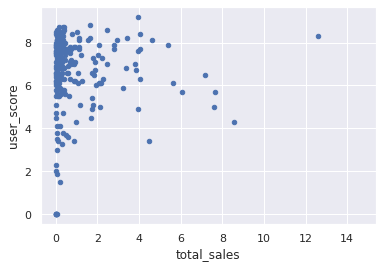

In [27]:
ps4 = top.query('platform == "PS4"')
ps4.plot(x='total_sales', y='user_score', kind='scatter')
ps4['user_score'] = ps4['user_score'].astype(float)
print('Коэффициент корреляции составляет ',ps4['user_score'].corr(ps4['total_sales']))




Для консоли PS4 можно сделать вывод, что оценки пользователей мало влияют на продажи, когда оценки критиков влияют на продажи с коэффициентом 0,4, что тоже является слабым влиянием. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/tmp/ipykernel_1564/2511746020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['user_score'] = ds['user_score'].astype(float)
/tmp/ipykernel_1564/2511746020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Коэффициент корреляции составляет  0.34586243970837477


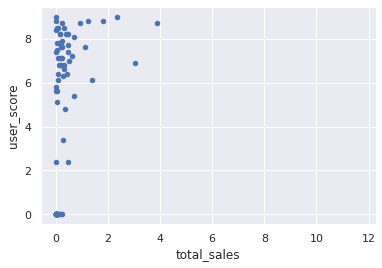

In [28]:
ds = top.query('platform == "3DS"')
ds.plot(x='total_sales', y='user_score', kind='scatter')
ds['user_score'] = ds['user_score'].astype(float)
ds['critic_score'] = ds['critic_score'].astype(float)
print('Коэффициент корреляции составляет ', ds['user_score'].corr(ds['total_sales']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции составляет  0.314117492869051


/tmp/ipykernel_1564/3608765692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['user_score'] = ds['user_score'].astype(float)
/tmp/ipykernel_1564/3608765692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['critic_score'] = ds['critic_score'].astype(float)


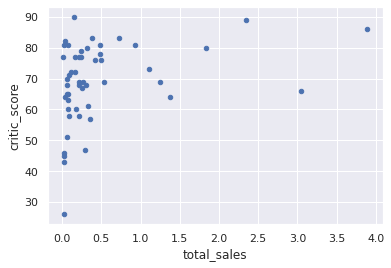

In [29]:
ds = top.query('platform == "3DS"')
ds.plot(x='total_sales', y='critic_score', kind='scatter')
ds['user_score'] = ds['user_score'].astype(float)
ds['critic_score'] = ds['critic_score'].astype(float)
print('Коэффициент корреляции составляет ', ds['critic_score'].corr(ds['total_sales']))


Для платформы 3DS можно сделать вывод о том, что и отзывы критиков и отзывы пользователей одинаково влияют на продажи, потому что коэффициенты корреляции практически равны и составляют 0,31 и 0,34 соответственно. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Коэффициент корреляции составляет  0.076073388592387


/tmp/ipykernel_1564/255113146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xone['user_score'] = xone['user_score'].astype(float)
/tmp/ipykernel_1564/255113146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xone['critic_score'] = xone['critic_score'].astype(float)


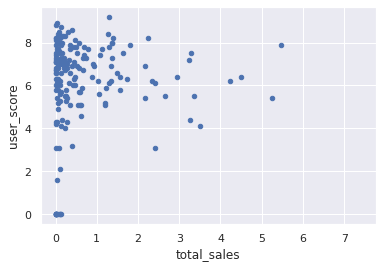

In [30]:
xone = top.query('platform == "XOne"')
xone.plot(x='total_sales', y='user_score', kind='scatter')
xone['user_score'] = xone['user_score'].astype(float)
xone['critic_score'] = xone['critic_score'].astype(float)
print('Коэффициент корреляции составляет ', xone['user_score'].corr(xone['total_sales']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/tmp/ipykernel_1564/3784062698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xone['user_score'] = xone['user_score'].astype(float)
/tmp/ipykernel_1564/3784062698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

Коэффициент корреляции составляет  0.42867694370333226


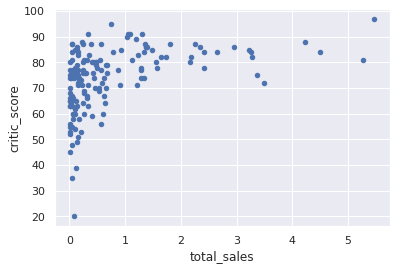

In [31]:
xone = top.query('platform == "XOne"')
xone.plot(x='total_sales', y='critic_score', kind='scatter')
xone['user_score'] = xone['user_score'].astype(float)
xone['critic_score'] = xone['critic_score'].astype(float)
print('Коэффициент корреляции составляет ', xone['critic_score'].corr(xone['total_sales']))

Для приставки XOne ситуация противоположная: отзывы критиков коррелируют с продажами с коэффициентом 0,42, а пользовательские отзывы коррелируют с коэффициентом 0,07

/tmp/ipykernel_1564/2672113714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wi['user_score'] = wi['user_score'].astype(float)
/tmp/ipykernel_1564/2672113714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wi['critic_score'] = wi['critic_score'].astype(float)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a sin

Коэффициент корреляции составляет  0.3518952473362983


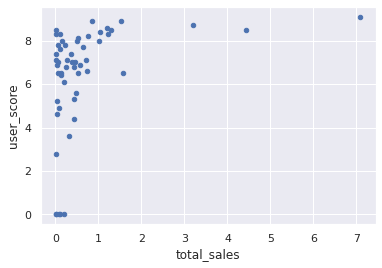

In [32]:
wi = top.query('platform == "WiiU"')
wi['user_score'] = wi['user_score'].astype(float)
wi['critic_score'] = wi['critic_score'].astype(float)
wi.plot(x='total_sales', y='user_score', kind='scatter')
print('Коэффициент корреляции составляет ', wi['user_score'].corr(wi['total_sales']))

/tmp/ipykernel_1564/3853171357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wi['user_score'] = wi['user_score'].astype(float)
/tmp/ipykernel_1564/3853171357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wi['critic_score'] = wi['critic_score'].astype(float)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a sin

Коэффициент корреляции составляет  0.370201412480884


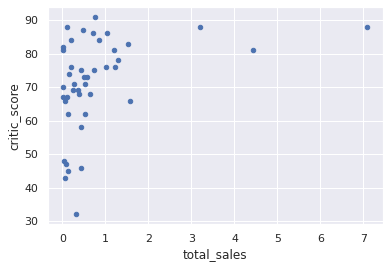

In [33]:
wi = top.query('platform == "WiiU"')
wi['user_score'] = wi['user_score'].astype(float)
wi['critic_score'] = wi['critic_score'].astype(float)
wi.plot(x='total_sales', y='critic_score', kind='scatter')
print('Коэффициент корреляции составляет ', wi['critic_score'].corr(wi['total_sales']))


Для платформы WiiU коэффициенты корреляции практически равны и составляют 0,37 для отзывов критиков и 0,35 для отзывов пользователей

/tmp/ipykernel_1564/1658745868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc['user_score'] = pc['user_score'].astype(float)
/tmp/ipykernel_1564/1658745868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc['critic_score'] = pc['critic_score'].astype(float)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a sin

Коэффициент корреляции составляет  0.0035928245777211653


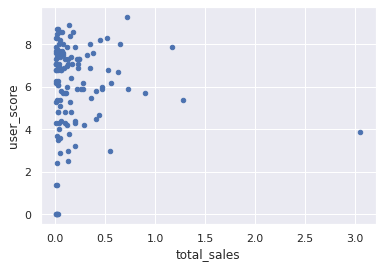

In [34]:
pc = top.query('platform == "PC"')
pc['user_score'] = pc['user_score'].astype(float)
pc['critic_score'] = pc['critic_score'].astype(float)
pc.plot(x='total_sales', y='user_score', kind='scatter')
print('Коэффициент корреляции составляет ', pc['user_score'].corr(pc['total_sales']))

/tmp/ipykernel_1564/1510545133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc['user_score'] = pc['user_score'].astype(float)
/tmp/ipykernel_1564/1510545133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc['critic_score'] = pc['critic_score'].astype(float)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a sin

Коэффициент корреляции составляет  0.17463413769350036


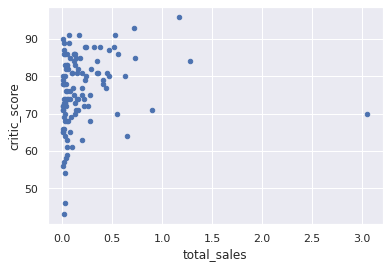

In [35]:
pc = top.query('platform == "PC"')
pc['user_score'] = pc['user_score'].astype(float)
pc['critic_score'] = pc['critic_score'].astype(float)
pc.plot(x='total_sales', y='critic_score', kind='scatter')
print('Коэффициент корреляции составляет ', pc['critic_score'].corr(pc['total_sales']))


У пользователей персональных комьютеров оценки пользователей практически не влияют на продажи, а оценки критиков коррелируют с продажами с коэффициентом 0,17

/tmp/ipykernel_1564/1943002762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psv['user_score'] = psv['user_score'].astype(float)
/tmp/ipykernel_1564/1943002762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psv['critic_score'] = psv['critic_score'].astype(float)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a

Коэффициент корреляции составляет  0.1285224992534306


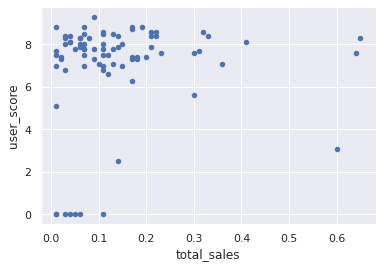

In [36]:
psv = top.query('platform == "PSV"')
psv['user_score'] = psv['user_score'].astype(float)
psv['critic_score'] = psv['critic_score'].astype(float)
psv.plot(x='total_sales', y='user_score', kind='scatter')
print('Коэффициент корреляции составляет ', psv['user_score'].corr(psv['total_sales']))

/tmp/ipykernel_1564/2638863835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psv['user_score'] = psv['user_score'].astype(float)
/tmp/ipykernel_1564/2638863835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psv['critic_score'] = psv['critic_score'].astype(float)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a

Коэффициент корреляции составляет  0.04266490657009526


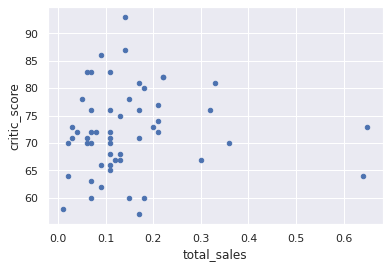

In [37]:
psv = top.query('platform == "PSV"')
psv['user_score'] = psv['user_score'].astype(float)
psv['critic_score'] = psv['critic_score'].astype(float)
psv.plot(x='total_sales', y='critic_score', kind='scatter')
print('Коэффициент корреляции составляет ', psv['critic_score'].corr(psv['total_sales']))

С платформой PSV можно увидеть, что отзывы критиков влияют меньше, чем отзывы пользователей. 

Таким образом можно сказать, что ни одна категория отзывов (critic_score и user_score) не имеет сильной связи с общими продажами. Другими словами, ни отзывы пользователей, ни отзывы критиков не могут оказать сильного влияния на продажи той или иной платформы. Исключения могут составить только консоль PS4, в которой коэффициент корреляции с отзывами критиков составляет 0,4, и примерно с таким же коэффициентом (0,42) отзывы критиков влияют на общие продажи консоли XOne. 

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

<AxesSubplot:>

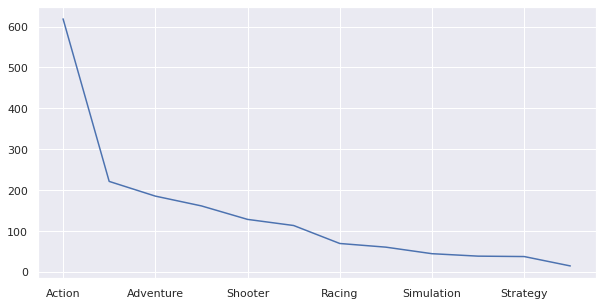

In [38]:
display(period['genre'].value_counts())
period['genre'].value_counts().plot(figsize=(10,5))

Из результаты можно сделать вывод, что наибольшее число игр, которое выпускалось за актуальный период, было в жанре Action. Второй место занимает Role-Playing, а третье место занимает Adventure. 

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


<AxesSubplot:>

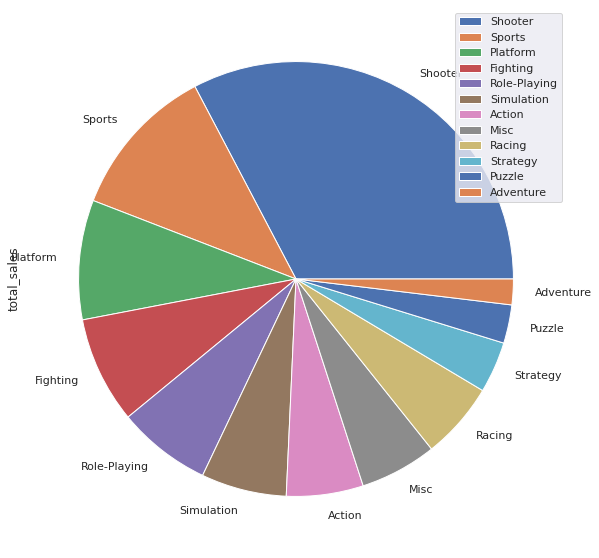

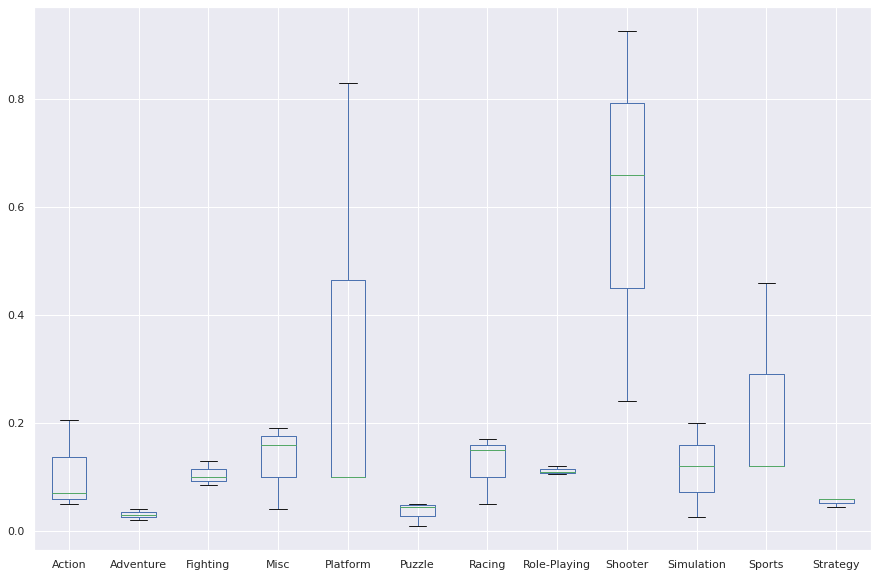

In [39]:
genre_sales = period.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
display(genre_sales)
genre_sales.plot(kind='pie', subplots=True, figsize=(10,10))
genre_sales_plot = period.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='median')
genre_sales_plot.plot(kind='box', figsize=(15,10))


Tоп-3 прибыльных жанра теперь выглядит так: первое место занимает Shooter, второе место Platform, а третье место Sports.

## Формулировка портретов пользователей из каждого представленного региона

,eu_sales,jp_sales,na_sales,other_sales,eu_percent,na_percent,jp_percent,other_percent
genre,,,,,,,,
Action,74.68,29.58,72.53,22.57,27.589774,25.533338,31.775701,27.652536
Adventure,6.49,3.60,5.64,1.82,2.397665,1.985496,3.867225,2.229846
Fighting,6.69,6.37,12.43,2.73,2.471553,4.375836,6.842840,3.344768
Misc,12.86,5.61,15.05,4.03,4.750997,5.298176,6.026426,4.937515
Platform,6.80,2.69,6.79,1.81,2.512192,2.390340,2.889677,2.217594
Puzzle,0.52,0.93,0.65,0.11,0.192109,0.228825,0.999033,0.134771
Racing,14.13,1.76,8.74,2.89,5.220186,3.076815,1.890643,3.540799
Role-Playing,28.17,31.16,33.47,8.64,10.407123,11.782722,33.472983,10.585641
Shooter,65.52,4.87,79.02,21.53,24.205704,27.818067,5.231496,26.378339


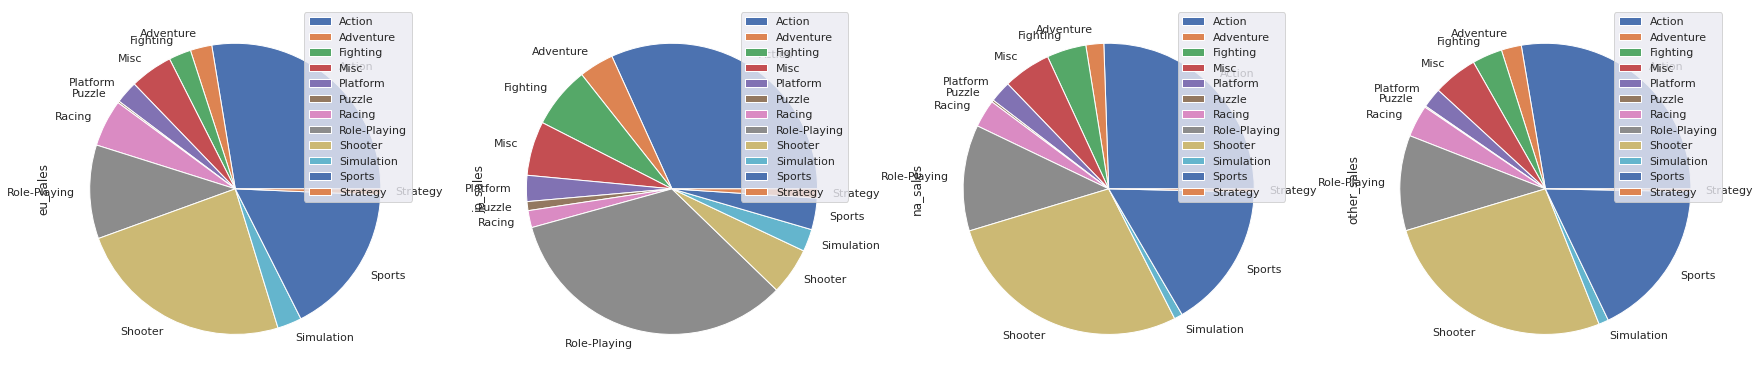

In [40]:
total_genre = period.pivot_table(index='genre', values=['eu_sales', 'na_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
total_genre.sort_values(ascending=False, by='eu_sales')
total_genre.plot(x='eu_sales', kind='pie', subplots=True, figsize=(30,35))

total_genre['eu_percent'] = (total_genre['eu_sales'] / total_genre['eu_sales'].sum()) * 100
total_genre['na_percent'] = (total_genre['na_sales'] / total_genre['na_sales'].sum()) * 100
total_genre['jp_percent'] = (total_genre['jp_sales'] / total_genre['jp_sales'].sum()) * 100
total_genre['other_percent'] = (total_genre['other_sales'] / total_genre['other_sales'].sum()) * 100

display(total_genre)


Можно заметить, что для всех стран преобладающей областью будет жанр Action, когда на втором месте также практически во всех странах будет Shooter, но не в Японии, где второй место занимает жанр Role-Playing.

,eu_sales,jp_sales,na_sales,other_sales,eu_percent,na_percent,jp_percent,other_percent
platform,,,,,,,,
3DS,16.12,44.24,22.64,3.68,5.955372,7.970147,47.523902,4.508699
PS4,130.04,15.02,98.61,44.48,48.041968,34.714497,16.134923,54.496447
PSV,3.53,14.54,2.52,1.81,1.304123,0.887137,15.619293,2.217594
PS3,25.54,11.22,22.05,9.37,9.435496,7.762445,12.052852,11.480029
WiiU,13.15,7.31,19.36,3.16,4.858135,6.815462,7.852616,3.871600
PSP,0.00,0.36,0.00,0.00,0.000000,0.000000,0.386723,0.000000
XOne,46.25,0.32,81.27,12.52,17.086597,28.610153,0.343753,15.339378
X360,15.49,0.08,28.30,4.35,5.722625,9.962684,0.085938,5.329576
PC,17.97,0.00,7.23,1.85,6.638836,2.545237,0.000000,2.266601


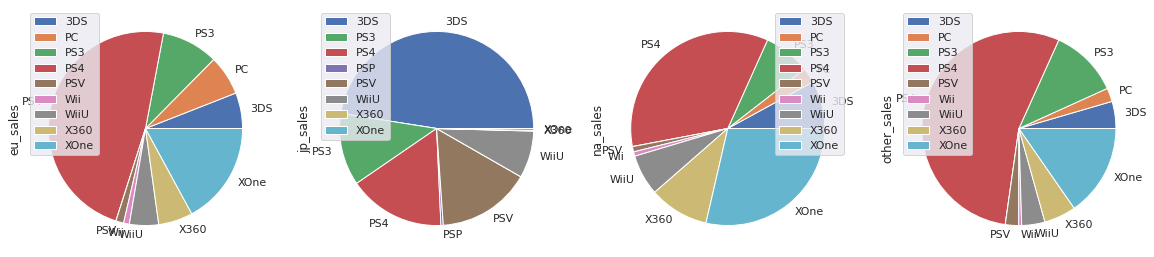

In [41]:
total_platform = period.pivot_table(index='platform', values=['eu_sales', 'na_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
total_platform.plot(x='eu_sales', kind='pie', subplots=True, figsize=(20,25))

total_platform['eu_percent'] = (total_platform['eu_sales'] / total_platform['eu_sales'].sum()) * 100
total_platform['na_percent'] = (total_platform['na_sales'] / total_platform['na_sales'].sum()) * 100
total_platform['jp_percent'] = (total_platform['jp_sales'] / total_platform['jp_sales'].sum()) * 100
total_platform['other_percent'] = (total_platform['other_sales'] / total_platform['other_sales'].sum()) * 100
total_platform = total_platform.sort_values(by='jp_percent', ascending=False)

display(total_platform)




Таким образом можно сказать, что в Европе лучше продаются PS4, в Японии 3DS, в Северной Америке доля PS4 практически равна XOne, а в других странах с большим перевесом лидирует PS4.

In [42]:
df['rating'] = df['rating'].fillna('unknown')
period['rating'] = period['rating'].fillna('unknown')

/tmp/ipykernel_1564/143498531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period['rating'] = period['rating'].fillna('unknown')


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


,eu_sales,jp_sales,na_sales,other_sales,eu_percent,jp_percent,na_percent,other_percent
rating,,,,,,,,
E,0.266193,0.041009,0.232752,0.070596,28.420898,26.784772,24.478874,25.871366
E10+,0.141902,0.024239,0.180598,0.042554,15.150633,15.831569,18.993718,15.594849
M,0.350227,0.030114,0.363295,0.107538,37.393118,19.668450,38.208275,39.409299
T,0.128083,0.050602,0.146429,0.042594,13.675154,33.049916,15.400091,15.609375
unknown,0.050204,0.007143,0.027755,0.009592,5.360197,4.665293,2.919042,3.515111


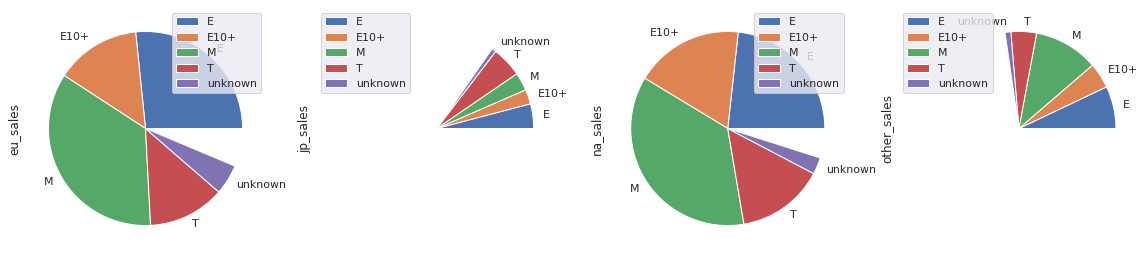

In [46]:
rating_sales = period.pivot_table(index='rating', values=['eu_sales', 'jp_sales', 'na_sales', 'other_sales'])
rating_sales.plot(x='eu_sales', kind='pie', subplots=True, figsize=(20,25))

rating_sales['eu_percent'] = (rating_sales['eu_sales'] / rating_sales['eu_sales'].sum()) * 100
rating_sales['jp_percent'] = (rating_sales['jp_sales'] / rating_sales['jp_sales'].sum()) * 100
rating_sales['na_percent'] = (rating_sales['na_sales'] / rating_sales['na_sales'].sum()) * 100
rating_sales['other_percent'] = (rating_sales['other_sales'] / rating_sales['other_sales'].sum()) * 100

display(rating_sales)

Таким образом можно сделать вывод о том, что практически в каждом регионе, кроме Японии лидирует рейтинг M, который обозначает, что контент предназначен для лиц, которые старше 17 лет. В Японии ситуация другая, лидирующий рейтинг там T, которые показывает игры, доступные для лиц старше 13 лет. 

## Проверка гипотез


Согласно заданию надо проверить гипотезу, которая заключается в равенстве пользовательских рейтингов. Таким образом можно выделить, что есть две платформы и один параметр, по которому происходит сравнение. Таким образом можно выделить следующие гипотезы:
    
    
H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Установим пороговое значение на уровне 0,05
    
Для проверки гипотезы применим односторонний тест. Во-первых, выборки не равны, что не позволит провести точный двухсторонний тест, во-вторых, мы не сравниваем выборку с одним значением, поэтому нам не подходит ttest_1samp, также мы работаем с гипотезой о равенстве среднего двух генеральных совокупностей, следовательно, можно использовать метод ttest_ind. 

In [44]:
period.loc[period['platform'] == 'XOne', 'user_score'] = period.loc[period['platform'] == 'XOne', 'user_score'].dropna()
period.loc[period['platform'] == 'PC', 'user_score'] = period.loc[period['platform'] == 'PC', 'user_score'].dropna()

period = period.dropna(subset=['user_score'])

period['platform'] = period['platform'].astype(str)
period['user_score'] = period['user_score'].astype(float)
a = period.loc[period['platform'] == 'XOne', 'user_score']
b = period.loc[period['platform'] == 'PC', 'user_score']

results = stats.ttest_ind(a, b)

alpha = .05
print(results.pvalue)

if results.pvalue < alpha: 
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else: 
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу')
    

0.5858355856278792
0.5858355856278792 Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Поправил тип данных и заполнил пропуски, вроде сейчас все работает. Также внес правки по приведенным выше комментариям, спасибо! 


Согласно техническому заданию можно также выделить категории, в которых будет проводиться сравнение. Таким образом мы выделяем категорию жанр, в которой нам понадобится Action и Sports. Поскольку нам надо сравнить пользовательские рейтинги, берем столбец user_score как ппараметр для сравнения. Получаются следующие гпиотезы:
    
H0: Средние пользовательские рейтинги жанров Action и Sports равны. 

H1: Средние пользовательские рейтинги жанров Action и Sports не равны. 
    
Установим пороговое значение на уровне 0,05
    
Таким образом, исходя из логики проверки гипотезы можно сделать вывод о том, что по описанию гипотезы, надо будет применить такой же тест. Получается, для проверки гипотезы о средних пользовательских рейтингах двух жанров мы будем использовать ttest_ind.

In [45]:
period['genre'] = period['genre'].astype(str)

period = period.dropna(subset = ['user_score'])

period['user_score'] = period['user_score'].astype(float)


a = period.loc[period['genre'] == 'Action', 'user_score']
b = period.loc[period['genre'] == 'Sports', 'user_score']

results = stats.ttest_ind(a, b)

alpha = .05
print(results.pvalue)

if results.pvalue < alpha: 
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else: 
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу')

9.92015750638991e-06
9.92015750638991e-06 Отвергаем нулевую гипотезу


# Вывод


Таким образом в ходе исследования были выполнены следующие задания: 
1) Заполнены или удалены пропуски там, где это возможно

2) Изменены типы некоторых данных

3) Была добавлена новая колонка total_sales 

3) Были построены графики, исследованы зависимости, а также проанализировано, в какую платформу выгоднее вкладываться

4) Были проверены две гипотезы о равенстве пользовательских оценках на PC и XOne, а также гипотеза о равенстве пользовательских оценок в жанрах Action и Sports. 

Исходя из приведенных выше результатов можно сделать следующие выводы и выбрать топ-2 платформы, в которые можно инвестировать. 
На момент построения боксплота можно сделать вывод о том, что для инвестирования подходят две платформы: PS4 и XOne. У них самые большие медианные продажи. Рассматривая PS4 можно заметить, что коэффициент корреляции общих продаж и отзывов критиков составляет 0,4, когда пользовательские отзывы практически не влияют на продажи (коэффициент корреляции равен 0,018). С XOne ситуация примерно такая же: корреляция с отзывами критиков составляет 0,42, а с отзывами пользователей: 0,07. Рассмтивая доли рынка можно заметить, что на европейском и американском рынках и рынках других стран топ-2 платформы по продажам это PS4 и XOne, на японском рынке на первое место вышла консоль 3DS. Касаясь жанров можно заметить, что по всем параметрам лидирует жанр Action, что говорит о том, что этот жанр будет прибыльнее других. 
    
Таким образом выбранные платформы PS4 и XOne будут одними из самых прибыльных на всех рынках, кроме японского.
